In [1]:
import numpy as np

In [2]:
group_data = np.array([
    [25, 1, 0],  # [age, t, sex]
    [30, 0, 1],
    [35, 1, 0],
    [40, 0, 1]
])
single_observation = np.array([32, 1, 0])

In [3]:
mean_vector = np.mean(group_data, axis=0)
mean_vector

array([32.5,  0.5,  0.5])

In [4]:
covariance_matrix = np.cov(group_data, rowvar=False)
covariance_matrix

array([[41.66666667, -1.66666667,  1.66666667],
       [-1.66666667,  0.33333333, -0.33333333],
       [ 1.66666667, -0.33333333,  0.33333333]])

In [6]:
covariance_matrix_pinv = np.linalg.pinv(covariance_matrix)
covariance_matrix_pinv

array([[ 0.03  ,  0.075 , -0.075 ],
       [ 0.075 ,  0.9375, -0.9375],
       [-0.075 , -0.9375,  0.9375]])

In [11]:
diff = single_observation - mean_vector
mahalanobis_distance = np.sqrt(diff.T @ covariance_matrix_pinv @ diff)
print(f"Mahalanobis Distance: {mahalanobis_distance}")

Mahalanobis Distance: 0.9327379053088815


In [8]:
from scipy.spatial.distance import mahalanobis

In [9]:
distance_scipy = mahalanobis(single_observation, mean_vector, covariance_matrix_pinv)

print(f"Mahalanobis Distance (scipy, pseudo-inverse): {distance_scipy}")

Mahalanobis Distance (scipy, pseudo-inverse): 0.9327379053088815


In [12]:
def mahalanobis_distance(x, mean, cov_inv):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff.T, cov_inv), diff))

In [17]:
distances = []
for i in range(group_data.shape[0]):
    distance = mahalanobis_distance(group_data[i], single_observation, covariance_matrix_pinv)
    distances.append(distance)

In [18]:
for i, dist in enumerate(distances):
    print(f"Distance to control {i+1}: {dist:.2f}")

Distance to control 1: 1.21
Distance to control 2: 2.11
Distance to control 3: 0.52
Distance to control 4: 1.81


## Matching Effects

In [30]:
import numpy as np
from scipy.spatial.distance import cdist

# Data
treated = np.array([78.17, 0, 1])  # Treated individual
control_data = np.array([
    [70.25, 1, 0],  # Control 1
    [75.33, 0, 1],  # Control 2
    [86.08, 1, 1],  # Control 3
    [54.97, 0, 0],  # Control 4
    [43.63, 0, 0],  # Control 5
    [18.04, 0, 1]   # Control 6
])
outcomes_control = np.array([60, 62, 70, 50, 40, 20])  
outcome_treated = 80  

distances = cdist([treated], control_data, metric='euclidean').flatten()
print("Distances:", distances)

# Find the closest control 
nearest_idx = np.argmin(distances)
matched_control = control_data[nearest_idx]
matched_outcome = outcomes_control[nearest_idx]

# Causal effect (without matching)
causal_effect_unmatched = outcome_treated - np.mean(outcomes_control)
# (with matching)
causal_effect_matched = outcome_treated - matched_outcome

print(f"Causal effect (without matching): {causal_effect_unmatched:.2f}")
print(f"Causal effect (with matching): {causal_effect_matched:.2f}")


Distances: [ 8.0452719   2.84        7.97296055 23.22154172 34.55447294 60.13      ]
Causal effect (without matching): 29.67
Causal effect (with matching): 18.00


In [31]:
np.random.seed(42)
n_controls = 100
treated_large = np.array([78.17, 0, 1])
control_data_large = np.random.uniform(low=10, high=100, size=(n_controls, 3))
outcomes_control_large = np.random.uniform(low=10, high=90, size=n_controls)
outcome_treated_large = 80

In [32]:
distances_large = cdist([treated_large], control_data_large, metric='euclidean').flatten()

# Find the closest control (1 nearest neighbor)
nearest_idx_large = np.argmin(distances_large)
matched_control_large = control_data_large[nearest_idx_large]
matched_outcome_large = outcomes_control_large[nearest_idx_large]


In [33]:
causal_effect_unmatched_large = outcome_treated_large - np.mean(outcomes_control_large)

# Causal effect (with matching)
causal_effect_matched_large = outcome_treated_large - matched_outcome_large

print(f"Causal effect (without matching, large case): {causal_effect_unmatched_large:.2f}")
print(f"Causal effect (with matching, large case): {causal_effect_matched_large:.2f}")

Causal effect (without matching, large case): 30.71
Causal effect (with matching, large case): 54.34


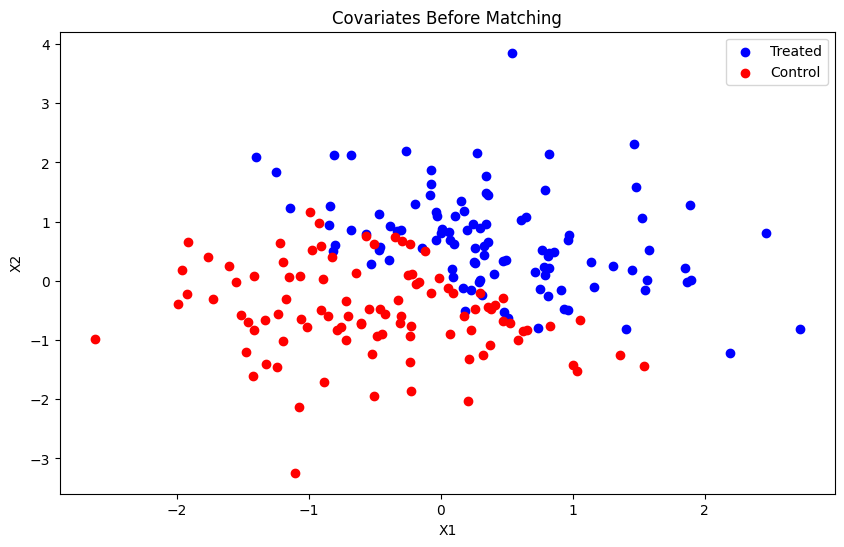

C:\Users\OMEN\AppData\Local\Temp\ipykernel_23016\1303553493.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treated['match_id'] = treated.index


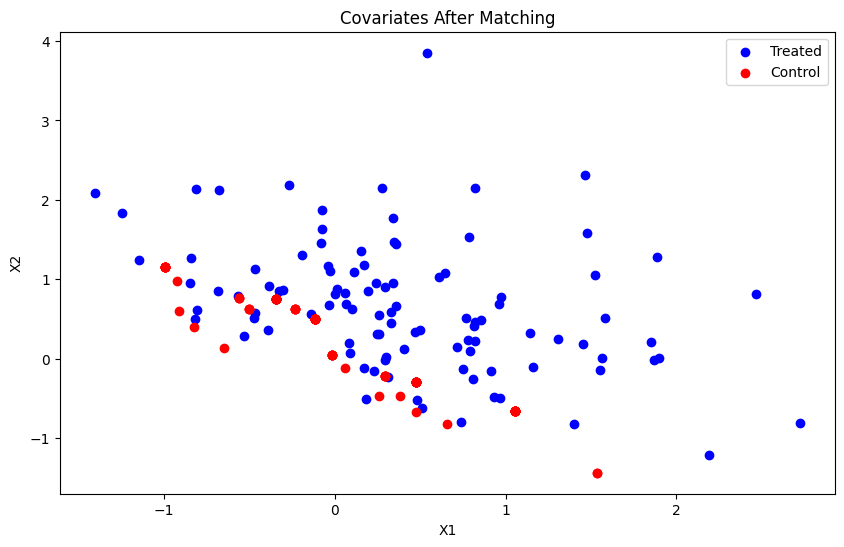

Estimated ATT (Average Treatment Effect on the Treated): 6.03
Covariate Means Before Matching:
          X1        X2
T                    
0 -0.513630 -0.522661
1  0.413545  0.670533

Covariate Means After Matching:
 X1_treated    0.413545
X1_control    0.042874
X2_treated    0.670533
X2_control    0.197712
dtype: float64


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.stats import norm

# 1. Simulating Data (similar to examples in causal inference texts)
np.random.seed(42)

# Covariates
n = 200  # Total number of observations
X1 = np.random.normal(0, 1, n)  # Covariate 1
X2 = np.random.normal(0, 1, n)  # Covariate 2

# Treatment assignment based on covariates (to introduce bias)
T = (X1 + X2 + np.random.normal(0, 0.5, n)) > 0  # Treated if this > 0
T = T.astype(int)

# Potential outcomes
Y0 = 3 + 2 * X1 + np.random.normal(0, 1, n)  # Control outcome
Y1 = Y0 + 5  # Treatment effect is 5

# Observed outcome
Y = T * Y1 + (1 - T) * Y0

# Create a DataFrame
data = pd.DataFrame({"X1": X1, "X2": X2, "T": T, "Y": Y})

# 2. Visualizing Data Before Matching
plt.figure(figsize=(10, 6))
plt.scatter(data[data['T'] == 1]['X1'], data[data['T'] == 1]['X2'], color='blue', label='Treated')
plt.scatter(data[data['T'] == 0]['X1'], data[data['T'] == 0]['X2'], color='red', label='Control')
plt.title("Covariates Before Matching")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

# 3. Nearest Neighbor Matching
# Separate treated and control groups
treated = data[data['T'] == 1]
control = data[data['T'] == 0]

# Using Nearest Neighbors to find matches
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(control[['X1', 'X2']])

distances, indices = nn.kneighbors(treated[['X1', 'X2']])
matched_control = control.iloc[indices.flatten()].copy()
matched_control['match_id'] = treated.index

# Combine matched treated and control
treated['match_id'] = treated.index
matched_data = pd.merge(treated, matched_control, on='match_id', suffixes=('_treated', '_control'))

# 4. Visualizing Data After Matching
plt.figure(figsize=(10, 6))
plt.scatter(matched_data['X1_treated'], matched_data['X2_treated'], color='blue', label='Treated')
plt.scatter(matched_data['X1_control'], matched_data['X2_control'], color='red', label='Control')
plt.title("Covariates After Matching")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

# 5. Estimating Treatment Effect
# Calculate ATT (Average Treatment effect on the Treated)
matched_data['effect'] = matched_data['Y_treated'] - matched_data['Y_control']
ATT = matched_data['effect'].mean()
print(f"Estimated ATT (Average Treatment Effect on the Treated): {ATT:.2f}")

# 6. Balance Check
# Before Matching
covariate_means = data.groupby('T')[['X1', 'X2']].mean()
print("Covariate Means Before Matching:\n", covariate_means)

# After Matching
covariate_means_matched = matched_data[['X1_treated', 'X1_control', 'X2_treated', 'X2_control']]
covariate_means_matched = covariate_means_matched.mean()
print("\nCovariate Means After Matching:\n", covariate_means_matched)
